#### Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.feature_selection import VarianceThreshold

#### Importing Data

In [47]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [48]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [49]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [50]:
categorical.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'RFA_2R',
       'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM',
       'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR',
       'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR',
       'FIRSTDATE_MM'],
      dtype='object')

In [51]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


#### Concatenating the 3 datasets into 1 

In [52]:
data = pd.concat([numerical, categorical, targets], axis = 1) 
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

#### Checking our target value counts

In [53]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

We can clearly appreciate an umbalanced dataset

#### Checking duplicates and nans

In [54]:
data.isna().sum().sum()

0

In [55]:
data.duplicated().sum()

0

#### Dropping columns from previous lab

In [56]:
data = data.drop(['ODATEW_YR', 'ODATEW_MM','DOB_YR','DOB_MM', 'MINRDATE_YR', 'MAXRDATE_YR','LASTDATE_YR', 'FIRSTDATE_YR'], axis = 1)

In [57]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,8,2,12,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,10,12,12,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,

#### X/y Split

In [58]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis=1)

#### Train/Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1224)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(76329, 330)

(19083, 330)

(76329,)

(19083,)

#### CAT/NUM train/test Split

In [60]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

#### Encoding Cat

In [61]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19079,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19081,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Scaling Num

In [63]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.reset_index(drop = True, inplace = True)
X_train_num_scale

(76329, 323)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_D
0,0.000000,0.690722,0.166667,1.000000,0.000000,0.010101,0.303030,0.393939,0.333333,0.070707,0.040404,0.022989,1.000000,0.088530,0.100017,0.081970,0.0,0.000000,1.000000,0.484848,0.525253,0.969697,0.010101,0.010101,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031250,0.000000,0.000000,0.000000,0.369048,0.464286,0.500000,0.380952,0.511905,0.547619,0.436620,0.383838,0.424242,0.212121,0.123711,0.242424,0.262626,0.28,0.101010,0.080808,0.070707,0.141414,0.161616,0.363636,0.212121,0.131313,0.171717,0.060606,0.161616,0.141414,0.303030,0.555556,0.353535,0.131313,0.040404,0.636364,0.101010,0.095890,0.202020,0.347692,0.420000,0.686869,0.676768,0.030303,0.101010,0.070707,0.040404,0.020202,0.020202,0.000000,0.097500,0.101667,0.230769,0.230769,0.848485,0.161616,0.959596,0.050505,0.121212,0.494949,0.828283,0.686869,0.383838,0.888889,0.121212,0.111111,0.04,0.090909,0.090909,0.131313,0.040404,0.352113,0.585859,0.131313,0.000000,0.010101,0.000000,0.000000,0.010101,0.080808,0.242424,0.646465,0.000000,0.020202,0.515152,0.647059,0.633333,0.262295,0.185185,0.080808,0.020202,0.212121,0.060606,0.050505,0.030303,0.010101,0.030303,0.151515,0.464646,0.808081,0.397436,0.091473,0.639047,0.223333,0.240000,0.245333,0.262000,0.072959,0.171717,0.171717,0.191919,0.242424,0.161616,0.090909,0.04,0.000000,0.000000,0.141414,0.151515,0.181818,0.272727,0.181818,0.050505,0.04,0.000000,0.000000,0.212121,0.070707,0.404040,0.070707,0.434343,0.575758,0.060606,0.838384,0.101010,0.000000,0.000000,0.0,0.0,0.0,0.030303,0.050505,0.000000,0.595960,0.233333,0.306667,0.030303,0.676768,0.727273,0.797980,0.656566,0.757576,0.636364,0.737374,0.585859,0.747475,1.0,0.050505,0.111111,0.121212,0.050505,0.111111,0.181818,0.000000,0.018182,0.101010,0.030303,0.121212,0.090909,0.050505,0.040404,0.030303,0.000000,0.050505,0.252525,0.050505,0.015625,0.030303,0.171717,0.060606,0.030303,0.030303,0.014925,0.101010,0.101010,0.060606,0.020202,0.070707,0.040404,0.020202,0.090909,0.717172,0.060606,0.000000,0.705882,0.080808,0.121212,0.313131,0.242424,0.228571,0.080808,0.080808,0.021505,0.292929,0.100000,0.305556,0.060606,0.010309,0.010101,0.0,0.141414,0.303030,0.033333,0.393939,0.131313,0

In [64]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(19083, 323)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_D
0,0.000000,0.649485,0.333333,0.666667,0.062241,0.010101,0.323232,0.414141,0.191919,0.070707,0.101010,0.034483,1.000000,0.036595,0.044181,0.034997,0.464646,0.000000,0.545455,0.505051,0.505051,0.969697,0.000000,0.010101,0.000000,0.040404,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.031250,0.000000,0.000000,0.000000,0.404762,0.500000,0.523810,0.404762,0.535714,0.559524,0.422535,0.303030,0.434343,0.272727,0.103093,0.191919,0.252525,0.38,0.131313,0.080808,0.050505,0.101010,0.141414,0.343434,0.252525,0.171717,0.181818,0.040404,0.161616,0.121212,0.363636,0.525253,0.333333,0.141414,0.030303,0.696970,0.080808,0.054795,0.191919,0.323077,0.415714,0.707071,0.707071,0.010101,0.020202,0.010101,0.010101,0.000000,0.000000,0.0,0.127333,0.135500,0.230769,0.230769,0.848485,0.161616,0.979798,0.030303,0.050505,0.444444,0.858586,0.747475,0.383838,0.929293,0.080808,0.070707,0.04,0.050505,0.080808,0.101010,0.030303,0.309859,0.606061,0.131313,0.000000,0.000000,0.000000,0.010101,0.040404,0.181818,0.525253,0.888889,0.000000,0.020202,0.626263,0.741176,0.688889,0.245902,0.148148,0.010101,0.010101,0.272727,0.070707,0.010101,0.010101,0.070707,0.090909,0.242424,0.525253,0.828283,0.989316,0.525581,0.919410,0.252667,0.279333,0.268000,0.302000,0.077864,0.181818,0.111111,0.161616,0.282828,0.191919,0.127273,0.02,0.000000,0.010101,0.101010,0.121212,0.111111,0.343434,0.232323,0.090909,0.04,0.000000,0.010101,0.202020,0.060606,0.454545,0.060606,0.393939,0.616162,0.050505,0.838384,0.111111,0.000000,0.000000,0.0,0.000000,0.00,0.030303,0.030303,0.010101,0.060606,0.200000,0.306667,0.080808,0.696970,0.737374,0.818182,0.646465,0.808081,0.595960,0.636364,0.616162,0.848485,0.000000,0.050505,0.131313,0.121212,0.020202,0.121212,0.151515,0.000000,0.018182,0.090909,0.050505,0.111111,0.040404,0.090909,0.060606,0.060606,0.016393,0.050505,0.141414,0.080808,0.078125,0.050505,0.202020,0.060606,0.020202,0.030303,0.000000,0.030303,0.101010,0.040404,0.070707,0.070707,0.101010,0.030303,0.060606,0.707071,0.030303,0.000000,0.729412,0.080808,0.121212,0.272727,0.292929,0.228571,0.121212,0.040404,0.032258,0.313131,0.066667,0.347222,0.070707,0.010309,0.010101,0.000000,0.161616,0.323232,0.033333

#### Concatenating Data for training

In [65]:
X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [66]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

In [67]:
data_train = pd.concat([X_train,y_train],axis = 1)
data_train

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_D,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.000000,0.690722,0.166667,1.000000,0.000000,0.010101,0.303030,0.393939,0.333333,0.070707,0.040404,0.022989,1.000000,0.088530,0.100017,0.081970,0.0,0.000000,1.000000,0.484848,0.525253,0.969697,0.010101,0.010101,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031250,0.000000,0.000000,0.000000,0.369048,0.464286,0.500000,0.380952,0.511905,0.547619,0.436620,0.383838,0.424242,0.212121,0.123711,0.242424,0.262626,0.28,0.101010,0.080808,0.070707,0.141414,0.161616,0.363636,0.212121,0.131313,0.171717,0.060606,0.161616,0.141414,0.303030,0.555556,0.353535,0.131313,0.040404,0.636364,0.101010,0.095890,0.202020,0.347692,0.420000,0.686869,0.676768,0.030303,0.101010,0.070707,0.040404,0.020202,0.020202,0.000000,0.097500,0.101667,0.230769,0.230769,0.848485,0.161616,0.959596,0.050505,0.121212,0.494949,0.828283,0.686869,0.383838,0.888889,0.121212,0.111111,0.04,0.090909,0.090909,0.131313,0.040404,0.352113,0.585859,0.131313,0.000000,0.010101,0.000000,0.000000,0.010101,0.080808,0.242424,0.646465,0.000000,0.020202,0.515152,0.647059,0.633333,0.262295,0.185185,0.080808,0.020202,0.212121,0.060606,0.050505,0.030303,0.010101,0.030303,0.151515,0.464646,0.808081,0.397436,0.091473,0.639047,0.223333,0.240000,0.245333,0.262000,0.072959,0.171717,0.171717,0.191919,0.242424,0.161616,0.090909,0.04,0.000000,0.000000,0.141414,0.151515,0.181818,0.272727,0.181818,0.050505,0.04,0.000000,0.000000,0.212121,0.070707,0.404040,0.070707,0.434343,0.575758,0.060606,0.838384,0.101010,0.000000,0.000000,0.0,0.0,0.0,0.030303,0.050505,0.000000,0.595960,0.233333,0.306667,0.030303,0.676768,0.727273,0.797980,0.656566,0.757576,0.636364,0.737374,0.585859,0.747475,1.0,0.050505,0.111111,0.121212,0.050505,0.111111,0.181818,0.000000,0.018182,0.101010,0.030303,0.121212,0.090909,0.050505,0.040404,0.030303,0.000000,0.050505,0.252525,0.050505,0.015625,0.030303,0.171717,0.060606,0.030303,0.030303,0.014925,0.101010,0.101010,0.060606,0.020202,

#### Setting Var. Threshold

In [68]:
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)
                        

(76329, 347)
(76329, 110)


In [69]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

347

#### Creating drop list and dropping

In [70]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

237

In [71]:
data_train = data_train.drop(drop_list, axis = 1)
data_train

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,0.690722,0.166667,1.000000,0.393939,0.333333,1.000000,0.0,0.000000,1.000000,0.969697,0.010101,0.555556,0.686869,0.676768,0.101010,0.070707,0.040404,0.097500,0.101667,0.230769,0.230769,0.848485,0.161616,0.121212,0.828283,0.686869,0.888889,0.585859,0.000000,0.010101,0.080808,0.242424,0.646465,0.000000,0.515152,0.020202,0.212121,0.030303,0.030303,0.151515,0.464646,0.808081,0.397436,0.091473,0.171717,0.404040,0.434343,0.575758,0.595960,0.676768,0.797980,0.757576,0.737374,0.585859,0.747475,1.0,0.393939,0.333333,0.777778,0.949495,0.686869,0.326923,0.181818,0.313131,0.666667,0.767677,0.242424,0.585859,0.080808,0.444444,0.565657,0.313131,0.476190,0.6,0.421053,0.376081,0.0,0.333333,0.590164,0.730769,0.5,0.333333,0.727273,0.000000,0.909091,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.793814,0.166667,1.000000,0.000000,0.000000,0.888889,1.0,0.000000,0.000000,0.929293,0.070707,0.090909,0.141414,0.131313,0.737374,0.646465,0.575758,0.075000,0.100500,0.230769,0.153846,0.232323,0.777778,0.070707,0.272727,0.222222,0.303030,0.393939,0.000000,0.070707,0.171717,0.232323,0.404040,0.000000,0.060606,0.555556,0.000000,0.575758,0.010101,0.020202,0.232323,0.737374,0.215812,0.510078,0.676768,0.525253,0.646465,0.363636,0.000000,0.353535,0.515152,0.484848,0.171717,0.000000,0.646465,0.0,0.313131,0.292929,0.161616,0.919192,0.070707,0.596154,0.000000,0.000000,0.000000,0.343434,0.666667,0.212121,0.646465,1.000000,0.000000,0.949495,0.142857,1.0,0.596491,0.077684,0.0,1.000000,0.786885,0.576923,0.5,0.666667,0.909091,0.818182,0.181818,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.690722,0.000000,1.000000,0.393939,0.323232,0.111111,0.0,0.282828,0.727273,1.000000,0.000000,0.434343,0.797980,0.797980,0.000000,0.000000,0.000000,0.058667,0.067833,0.153846,0.076923,0.797980,0.212121,0.353535,0.767677,0.666667,0.838384,0.565657,0.000000,0.000000,0.020202,0.060606,0.333333,0.000000,0.505051,0.000000,0.202020,0.000000,0.000000,0.010101,0.050505,0.323232,0.000000,0.119380,0.353535,0.323232,0.363636,0.646465,0.262626,0.313131,0.747475,0.707071,0.717172,0.505051,0.878788,1.0,0.393939,0.323232,0.888889,0.989899,0.686869,0.519231,0.070707,0.101010,0.464646,0.585859,0.424242,0.444444,0.131313,0.333333,0.646465,0.323232,0.476190,0.4,0.350877,0.513630,0.0,0.000000,0.918033,0.807692,0.5,0.333333,0.272727,0.363636,0.363636,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.505155,0.500000,0.444444,0.121212,0.454545,1.000000,0.0,0.040404,0.969697,1.000000,0.000000,0.505051,0.848485,0.848485,0.000000,0.000000,0.000000,0.100167,0.107833,0.153846,0.076923,0.858586,0.151515,0.252525,0.848485,0.787879,0.929293,0.595960,0.010101,0.010101,0.101010,0.292929,0.666667,0.000000,0.555556,0.000000,0.141414,0.000000,0.020202,0.020202,0.090909,0.414141,0.000000,0.144186,0.131313,0.555556,0.303030,0.707071,0.343434,0.636364,0.777778,0.727273,0.626263,0.484848,1.000000,1.0,0.121212,0.454545,0.575758,1.000000,0.777778,0.538462,0.131313,0.222222,0.444444,0.555556,0.454545,0.040404,0.313131,0.575758,0.333333,0.141414,0.285714,0.4,0.087719,0.327165,0.0,0.000000,0.704918,0.923077,0.0,0.3333

In [72]:
X_train = X_train.drop(drop_list, axis = 1)
X_train

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.690722,0.166667,1.000000,0.393939,0.333333,1.000000,0.0,0.000000,1.000000,0.969697,0.010101,0.555556,0.686869,0.676768,0.101010,0.070707,0.040404,0.097500,0.101667,0.230769,0.230769,0.848485,0.161616,0.121212,0.828283,0.686869,0.888889,0.585859,0.000000,0.010101,0.080808,0.242424,0.646465,0.000000,0.515152,0.020202,0.212121,0.030303,0.030303,0.151515,0.464646,0.808081,0.397436,0.091473,0.171717,0.404040,0.434343,0.575758,0.595960,0.676768,0.797980,0.757576,0.737374,0.585859,0.747475,1.0,0.393939,0.333333,0.777778,0.949495,0.686869,0.326923,0.181818,0.313131,0.666667,0.767677,0.242424,0.585859,0.080808,0.444444,0.565657,0.313131,0.476190,0.6,0.421053,0.376081,0.0,0.333333,0.590164,0.730769,0.5,0.333333,0.727273,0.000000,0.909091,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.793814,0.166667,1.000000,0.000000,0.000000,0.888889,1.0,0.000000,0.000000,0.929293,0.070707,0.090909,0.141414,0.131313,0.737374,0.646465,0.575758,0.075000,0.100500,0.230769,0.153846,0.232323,0.777778,0.070707,0.272727,0.222222,0.303030,0.393939,0.000000,0.070707,0.171717,0.232323,0.404040,0.000000,0.060606,0.555556,0.000000,0.575758,0.010101,0.020202,0.232323,0.737374,0.215812,0.510078,0.676768,0.525253,0.646465,0.363636,0.000000,0.353535,0.515152,0.484848,0.171717,0.000000,0.646465,0.0,0.313131,0.292929,0.161616,0.919192,0.070707,0.596154,0.000000,0.000000,0.000000,0.343434,0.666667,0.212121,0.646465,1.000000,0.000000,0.949495,0.142857,1.0,0.596491,0.077684,0.0,1.000000,0.786885,0.576923,0.5,0.666667,0.909091,0.818182,0.181818,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.690722,0.000000,1.000000,0.393939,0.323232,0.111111,0.0,0.282828,0.727273,1.000000,0.000000,0.434343,0.797980,0.797980,0.000000,0.000000,0.000000,0.058667,0.067833,0.153846,0.076923,0.797980,0.212121,0.353535,0.767677,0.666667,0.838384,0.565657,0.000000,0.000000,0.020202,0.060606,0.333333,0.000000,0.505051,0.000000,0.202020,0.000000,0.000000,0.010101,0.050505,0.323232,0.000000,0.119380,0.353535,0.323232,0.363636,0.646465,0.262626,0.313131,0.747475,0.707071,0.717172,0.505051,0.878788,1.0,0.393939,0.323232,0.888889,0.989899,0.686869,0.519231,0.070707,0.101010,0.464646,0.585859,0.424242,0.444444,0.131313,0.333333,0.646465,0.323232,0.476190,0.4,0.350877,0.513630,0.0,0.000000,0.918033,0.807692,0.5,0.333333,0.272727,0.363636,0.363636,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.505155,0.500000,0.444444,0.121212,0.454545,1.000000,0.0,0.040404,0.969697,1.000000,0.000000,0.505051,0.848485,0.848485,0.000000,0.000000,0.000000,0.100167,0.107833,0.153846,0.076923,0.858586,0.151515,0.252525,0.848485,0.787879,0.929293,0.595960,0.010101,0.010101,0.101010,0.292929,0.666667,0.000000,0.555556,0.000000,0.141414,0.000000,0.020202,0.020202,0.090909,0.414141,0.000000,0.144186,0.131313,0.555556,0.303030,0.707071,0.343434,0.636364,0.777778,0.727273,0.626263,0.484848,1.000000,1.0,0.121212,0.454545,0.575758,1.000000,0.777778,0.538462,0.131313,0.222222,0.444444,0.555556,0.454545,0.040404,0.313131,0.575758,0.333333,0.141414,0.285714,0.4,0.087719,0.327165,0.0,0.000000,0.704918,0.923077,0.0,0.333333,0.727273,0.7

#### KBEST Selection

In [73]:
print(X_train.shape)

K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected

(76329, 110)
(76329, 25)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.010101,0.097500,0.101667,0.230769,0.000000,0.010101,0.080808,0.242424,0.646465,0.000000,0.030303,0.151515,0.464646,0.421053,0.333333,0.590164,0.333333,0.909091,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.070707,0.075000,0.100500,0.153846,0.000000,0.070707,0.171717,0.232323,0.404040,0.000000,0.010101,0.020202,0.232323,0.596491,1.000000,0.786885,0.666667,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.058667,0.067833,0.076923,0.000000,0.000000,0.020202,0.060606,0.333333,0.000000,0.000000,0.010101,0.050505,0.350877,0.000000,0.918033,0.333333,0.363636,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.100167,0.107833,0.076923,0.010101,0.010101,0.101010,0.292929,0.666667,0.000000,0.020202,0.020202,0.090909,0.087719,0.000000,0.704918,0.333333,0.727273,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.000000,0.198500,0.206333,0.384615,0.070707,0.181818,0.696970,0.858586,1.000000,0.010101,0.737374,0.919192,0.969697,0.578947,0.333333,0.049180,0.000000,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.000000,0.107500,0.113667,0.230769,0.000000,0.010101,0.070707,0.232323,0.878788,0.000000,0.040404,0.222222,0.767677,0.333333,0.666667,0.606557,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
76325,0.040404,0.164333,0.174500,0.307692,0.010101,0.060606,0.484848,0.909091,1.000000,0.000000,0.121212,0.707071,0.959596,0.350877,0.000000,0.163934,0.000000,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,1.0
76326,0.020202,0.120333,0.121833,0.538462,0.000000,0.000000,0.010101,0.404040,0.979798,0.000000,0.939394,0.989899,1.000000,0.175439,0.000000,0.409836,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76327,0.020202,0.304667,0.305833,0.692308,0.313131,0.737374,1.000000,1.000000,1.000000,0.010101,0.909091,0.909091,0.959596,0.280702,0.333333,0.278689,0.000000,0.909091,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
model = SelectKBest(chi2, k=25).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(110, 2)

,score,column_name
77,171.834226,RFA_2F
102,72.239336,RFA_2A_G
100,62.920000,RFA_2A_E
101,34.881629,RFA_2A_F
29,20.456351,HVP2
28,19.480081,HVP1
30,18.660026,HVP3
33,13.081346,HVP6
31,12.466895,HVP4
97,11.694374,HOMEOWNR_U


In [75]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'HVP2',
 'HVP1',
 'HVP3',
 'HVP6',
 'HVP4',
 'HOMEOWNR_U',
 'ETH2',
 'RP1',
 'RP2',
 'STATE_GA',
 'CARDPROM',
 'HV1',
 'HV2',
 'LASTDATE_MM',
 'RP3',
 'DOMAIN_B',
 'HVP5',
 'STATE_IN',
 'CLUSTER2',
 'STATE_IL',
 'HV4']

In [76]:
X_corr_data = data_train[['RFA_2F',
 'RFA_2A_G',
 'RFA_2A_E',
 'RFA_2A_F',
 'HVP2',
 'HVP1',
 'HVP3',
 'HVP6',
 'HVP4',
 'HOMEOWNR_U',
 'ETH2',
 'RP1',
 'RP2',
 'STATE_GA',
 'CARDPROM',
 'HV1',
 'HV2',
 'LASTDATE_MM',
 'RP3',
 'DOMAIN_B',
 'HVP5',
 'STATE_IN',
 'CLUSTER2',
 'STATE_IL',
 'HV4']]

In [77]:
X_test_all = X_test[['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'HVP1',
 'HVP2',
 'HVP6',
 'HVP3',
 'HVP4',
 'ETH2',
 'RP1',
 'RP2',
 'HV1',
 'HV2',
 'CARDPROM',
 'STATE_GA',
 'DOMAIN_B',
 'STATE_IN',
 'HVP5',
 'MSA',
 'CONTROLN',
 'INCOME',
 'CLUSTER2',
 'STATE_IL',
 'RP3']]

#### Correlation Matrix

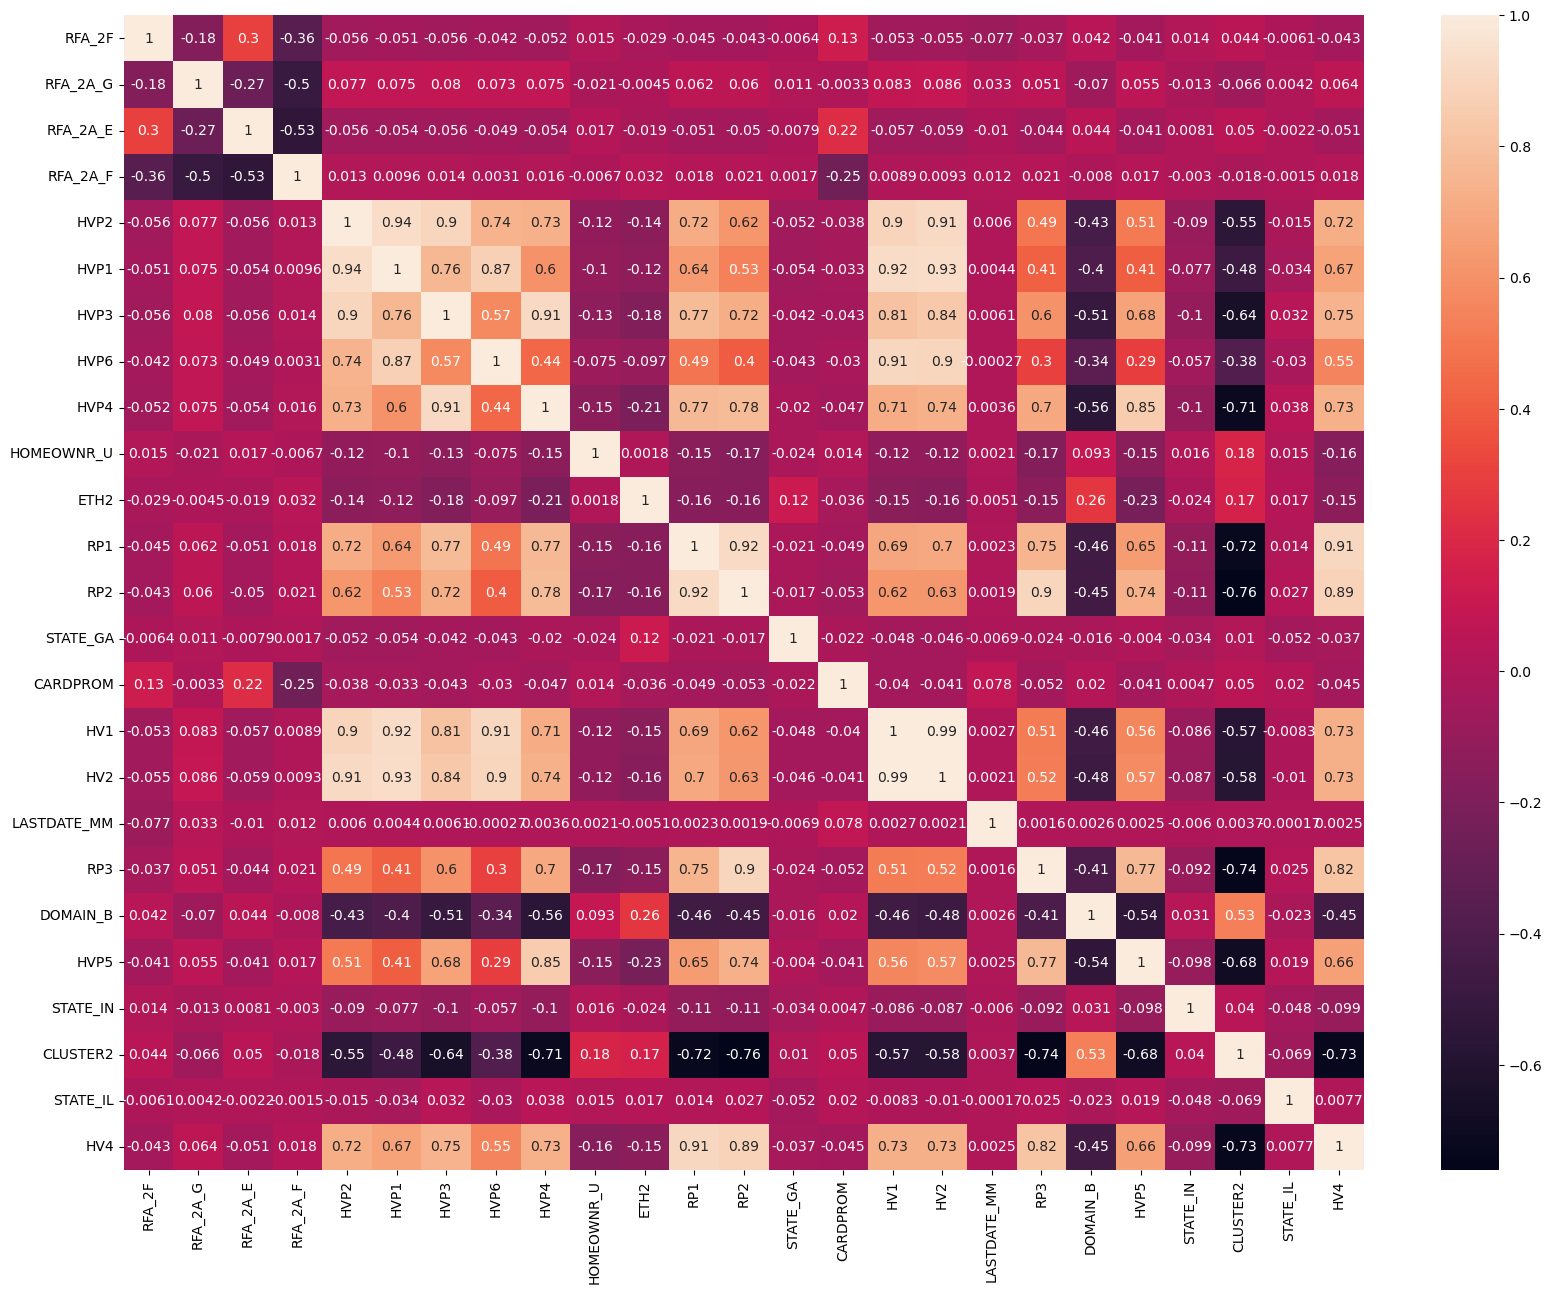

In [78]:
corr_matrix = X_corr_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [79]:
col_to_drop = ['HVP1','HVP2','HVP3','HVP5','HVP6','HV1','HV2','RP1','RP2']
# HVP4 HV4 and RP3 will stay 

In [80]:
X_train = X_corr_data.drop(col_to_drop, axis = 1)
print(X_train.shape)
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

(76329, 16)


,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,HVP4,ETH2,CARDPROM,STATE_GA,DOMAIN_B,STATE_IN,MSA,CONTROLN,INCOME,CLUSTER2,STATE_IL,RP3
0,0.666667,1.0,0.0,0.0,0.525253,0.000000,0.210526,0.0,0.333333,0.0,0.989316,0.957493,0.333333,0.606557,0.0,0.525253
1,0.000000,0.0,1.0,0.0,0.686869,0.000000,0.087719,0.0,0.333333,0.0,0.000000,0.837729,0.333333,0.885246,0.0,0.606061
2,0.666667,0.0,0.0,1.0,0.040404,0.070707,0.614035,0.0,0.333333,0.0,0.293803,0.177805,0.000000,0.557377,0.0,0.666667
3,0.333333,0.0,1.0,0.0,0.131313,0.414141,0.333333,0.0,0.666667,0.0,0.205128,0.610831,0.500000,0.819672,0.0,0.777778
4,0.000000,0.0,0.0,1.0,0.363636,0.343434,0.333333,1.0,0.333333,0.0,0.055556,0.151190,0.666667,0.622951,0.0,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.000000,1.0,0.0,0.0,0.929293,0.030303,0.473684,0.0,0.000000,0.0,0.384615,0.230141,0.666667,0.065574,0.0,0.858586
19079,0.000000,0.0,1.0,0.0,0.555556,0.131313,0.087719,0.0,0.000000,0.0,0.752137,0.519158,0.833333,0.311475,0.0,0.989899
19080,0.333333,0.0,1.0,0.0,1.000000,0.020202,0.175439,0.0,0.333333,0.0,0.724359,0.785768,0.833333,0.180328,0.0,0.888889
19081,0.000000,0.0,0.0,1.0,0.000000,0.898990,0.280702,0.0,1.000000,0.0,0.230769,0.355693,0.166667,0.475410,0.0,0.464646


#### Model with selected features

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.949219824706206
TestSet =  0.9493266257925903


In [82]:
y_train.value_counts()
# imbalanced

0    72453
1     3876
Name: TARGET_B, dtype: int64

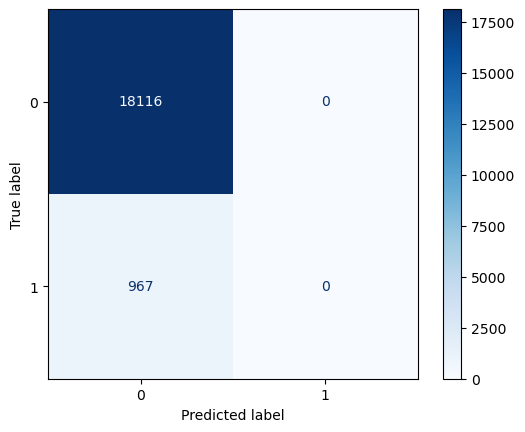

In [84]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

Here we can clearly observe that our model is actually not predicting donations, but completely the oppositte. No donations. 

#### Balance the Data

In [38]:
data_for_balance = pd.concat([X_train,y_train], axis=1)

In [39]:
#balacning data - upsampling
no_donate = data_for_balance[data_for_balance['TARGET_B']==0]
yes_donate = data_for_balance[data_for_balance['TARGET_B']==1]

from sklearn.utils import resample
yes_donate_oversampled = resample(yes_donate, 
                                    replace=True,
                                    n_samples = len(no_donate),
                                    random_state=42)


display(no_donate.shape)
display(yes_donate_oversampled.shape)

(72453, 17)

(72453, 17)

In [40]:
oversampled_target = pd.concat([no_donate,yes_donate_oversampled], axis = 0)

# scrambled rows to avoid yes/no clusters
oversampled_total = oversampled_target.sample(frac=1)

X_train_oversampled = oversampled_total.drop(['TARGET_B'], axis = 1)

y_train_oversampled =oversampled_total['TARGET_B']

In [41]:
display(X_train_oversampled.shape)
display(y_train_oversampled.shape)

(144906, 16)

(144906,)

#### Re modeling with the balanced data

In [88]:
clf2 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf2.fit(X_train_oversampled, y_train_oversampled)
print('TrainSet = ',clf.score(X_train_oversampled, y_train_oversampled))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.5
TestSet =  0.9493266257925903


In [89]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf2, X_train_oversampled, y_train_oversampled, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)

0.5975114879376594
[0.59823339 0.59278173 0.59809537 0.60734249 0.59602512 0.59291974
 0.59089027 0.59799862 0.59413389 0.60669427]


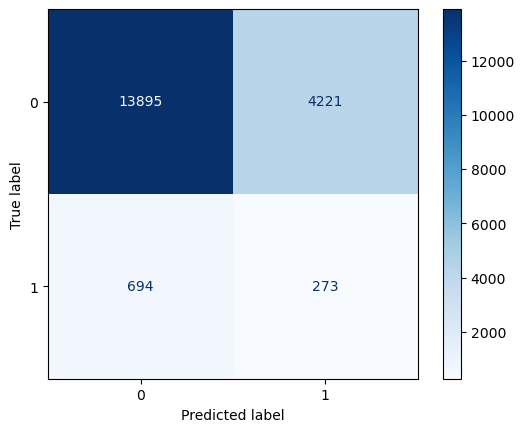

In [90]:
plot_confusion_matrix(clf2, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

#### Scale and encode ALL of the data for model

In [92]:
Xcat = X.select_dtypes(include=object)
Xnum = X.select_dtypes(include=np.number)
Xcat

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S
...,...,...,...,...,...,...,...
95407,other,H,M,L,G,C,C
95408,TX,H,M,L,F,A,C
95409,MI,H,M,L,E,B,C
95410,CA,H,F,L,F,A,C


In [93]:
encoder = OneHotEncoder(drop='first').fit(Xcat)

cols = encoder.get_feature_names(input_features=Xcat.columns)

Xcat_encode = pd.DataFrame(encoder.transform(Xcat).toarray(),columns=cols)

Xcat_encode.reset_index(drop = True, inplace = True)
Xcat_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
transformer = MinMaxScaler().fit(Xnum)
Xnum_norm = transformer.transform(Xnum)
print(Xnum_norm.shape)
Xnum_scale = pd.DataFrame(Xnum_norm, index = Xnum.index, columns=Xnum.columns)
Xnum_scale.head()
Xnum_scale.reset_index(drop = True, inplace = True)

(95412, 323)


In [96]:
X = pd.concat([Xnum_scale,Xcat_encode], axis = 1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_D,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000000,0.608247,0.666667,1.000000,0.000000,0.000000,0.393939,0.343434,0.181818,0.101010,0.020202,0.011494,0.555556,0.010051,0.011108,0.009378,0.000000,0.353535,0.656566,0.474747,0.535354,0.929293,0.010101,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.113402,0.000000,0.000000,0.000000,0.464286,0.571429,0.607143,0.476190,0.595238,0.642857,0.333333,0.313131,0.424242,0.272727,0.111111,0.141414,0.181818,0.171717,0.131313,0.111111,0.151515,0.121212,0.111111,0.343434,0.252525,0.181818,0.262626,0.101010,0.232323,0.181818,0.333333,0.494949,0.282828,0.121212,0.040404,0.616162,0.070707,0.164384,0.191919,0.304615,0.394286,0.979798,0.959596,0.020202,0.020202,0.000000,0.000000,0.070707,0.070707,0.000000,0.079833,0.105833,0.230769,0.153846,0.868687,0.141414,0.969697,0.040404,0.070707,0.383838,0.808081,0.707071,0.323232,0.848485,0.161616,0.060606,0.04,0.050505,0.090909,0.151515,0.030303,0.226667,0.505051,0.252525,0.000000,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.010101,0.616162,0.682353,0.677778,0.245902,0.100,0.020202,0.000000,0.000000,0.141414,0.010101,0.000000,0.000000,0.020202,0.050505,0.171717,0.737374,0.000000,0.271889,0.774120,0.204667,0.212000,0.232667,0.252000,0.073818,0.131313,0.232323,0.232323,0.232323,0.151515,0.010101,0.00,0.000000,0.010101,0.040404,0.252525,0.242424,0.262626,0.171717,0.020202,0.00,0.000000,0.020202,0.282828,0.040404,0.515152,0.010101,0.464646,0.545455,0.030303,0.888889,0.080808,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.040404,0.010101,0.131313,0.155556,0.210526,0.020202,0.454545,0.565657,0.646465,0.505051,0.646465,0.444444,0.626263,0.535354,1.000000,0.000000,0.000000,0.090909,0.030303,0.080808,0.131313,0.090909,0.000000,0.054545,0.090909,0.030303,0.151515,0.191919,0.050505,0.040404,0.030303,0.000000,0.030303,0.414141,0.010101,0.000000,0.070707,0.131313,0.060606,0.050505,0.000000,0.059701,0.090909,0.040404,0.010101,0.030303,0.

In [97]:
X = X.drop(drop_list, axis = 1)   
X.shape

(95412, 110)

In [98]:
X = X[col_list]           
X.shape

(95412, 25)

In [99]:
X = X.drop(col_to_drop, axis = 1)
X.shape

(95412, 16)

#### Re testing Model with all the data

In [100]:
print('All data = ',clf2.score(X,y))

All data =  0.6303085565756927


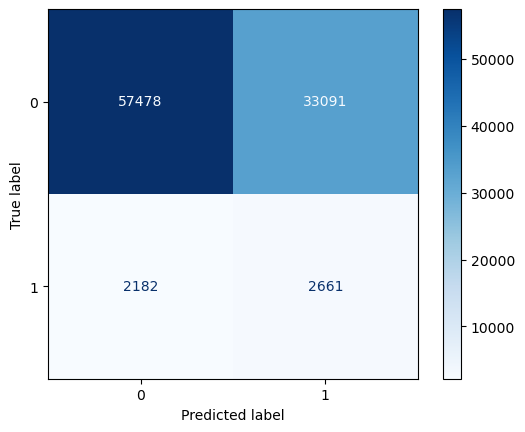

In [101]:
plot_confusion_matrix(clf2, X,y,cmap=plt.cm.Blues)  
plt.show()

In [103]:
cross_val_scores = cross_val_score(clf2, X_train_oversampled, y_train_oversampled, cv=10)
print(np.mean(cross_val_scores))
print(cross_val_scores)

0.5979186791125536
[0.59926851 0.59188462 0.59816438 0.60568629 0.59650818 0.59188462
 0.59323671 0.59937888 0.5957902  0.6073844 ]


#### Getting Target D mean

In [107]:
data_targetD = data[data['TARGET_B']==1]
data_targetD

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,1,4,3,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,4,1,12,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,2,0,0,39,57,71,89,1360.0,173

In [108]:
data_targetD['TARGET_D'].value_counts()

10.00    941
15.00    591
20.00    577
5.00     503
25.00    392
        ... 
10.70      1
18.25      1
16.87      1
2.50       1
44.21      1
Name: TARGET_D, Length: 70, dtype: int64

In [109]:
data_targetD['TARGET_D'].mean()

15.624344414619037

#### Results

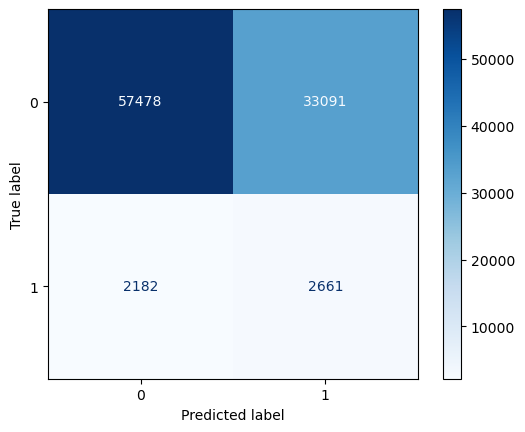

In [110]:
plot_confusion_matrix(clf2, X,y,cmap=plt.cm.Blues)  
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
predict_y = clf2.predict(X)


array = confusion_matrix(y, predict_y)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)

57478
33091
2182
2661


In [113]:
donation_gained = Q4 * 15.6
unexpected_donation = Q3 * 15.6
spend_marketing = (Q4+Q2) * 0.68
no_return_marketing = Q2 * 0.68
overall_revenue = (donation_gained + unexpected_donation) - spend_marketing



print('Donation amount gained:',round(donation_gained,2))
print('Unexpected Donations:',round(unexpected_donation,2))
print('Amount spent (cost) on marketing:',round(spend_marketing,2))
print('Amount lost on marketing:',round(no_return_marketing,2))

print('Overall revenue (donation - cost):',round(overall_revenue,2))

Donation amount gained: 41511.6
Unexpected Donations: 34039.2
Amount spent (cost) on marketing: 24311.36
Amount lost on marketing: 22501.88
Overall revenue (donation - cost): 51239.44


In [114]:
print('In the above plot we can see that there are    ',Q3,'    people of whom the model predicts they will not donate,')
print('when they actually would donate, AKA falsely predicted non-donators.')
print('We gain a donation amount of    ',unexpected_donation,'    from this group.')
print('There are also   ', Q2 ,'    people of whom the model predicts they will donate, when they actually do not.')
print('We  lose   ', no_return_marketing,'   on mailing costs from this group.')
print('When we look at the average donation amount of someone who actually donates is around 15.62 dollars.')
print('We raise   ', overall_revenue ,'   dollars with this model.')

In the above plot we can see that there are     2182     people of whom the model predicts they will not donate,
when they actually would donate, AKA falsely predicted non-donators.
We gain a donation amount of     34039.2     from this group.
There are also    33091     people of whom the model predicts they will donate, when they actually do not.
We  lose    22501.88    on mailing costs from this group.
When we look at the average donation amount of someone who actually donates is around 15.62 dollars.
We raise    51239.43999999999    dollars with this model.


#### Predicting amount given among actual donators

In [115]:
data_targetD

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,1,4,3,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,4,1,12,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,2,0,0,39,57,71,89,1360.0,173

In [117]:
X_D = data_targetD.drop(['TARGET_D', 'TARGET_B'], axis=1)
y_D = data_targetD['TARGET_D']
display(X_D)
display(y_D)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,1,4,3,1
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,4,1,12,4
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,2,0,0,39,57,71,89,1360.0,173.0,637.0,550,637,607,703,26007

20        4.0
30        7.0
45        5.0
78       13.0
93       10.0
         ... 
95298    20.0
95309    15.0
95398     3.0
95403    10.0
95410    18.0
Name: TARGET_D, Length: 4843, dtype: float64

#### X/y Train/Test split

In [118]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_D, y_D, test_size=0.2, random_state=42)

In [120]:
X_train_cat1 = X_train1.select_dtypes(include = object)
X_train_num1 =X_train1.select_dtypes(include = np.number)
X_test_cat1 = X_test1.select_dtypes(include = object)
X_test_num1 =X_test1.select_dtypes(include = np.number)

#### Enconding cats

In [121]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat1)

cols1 = encoder.get_feature_names(input_features=X_train_cat1.columns)

X_train_cat_encode1 = pd.DataFrame(encoder.transform(X_train_cat1).toarray(),columns=cols1)

X_train_cat_encode1.reset_index(drop = True, inplace = True)
X_train_cat_encode1

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [122]:
cols = encoder.get_feature_names(input_features=X_test_cat1.columns)

X_test_cat_encode1 = pd.DataFrame(encoder.transform(X_test_cat1).toarray(),columns=cols)

X_test_cat_encode1.reset_index(drop = True, inplace = True)
X_test_cat_encode1

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
966,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
967,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Scaling numericals

In [123]:
transformer = MinMaxScaler().fit(X_train_num1)
X_train_num_norm1 = transformer.transform(X_train_num1)
print(X_train_num_norm1.shape)
X_train_num_scale1 = pd.DataFrame(X_train_num_norm1, index = X_train_num1.index, columns=X_train_num1.columns)
X_train_num_scale1.head()
X_train_num_scale1.reset_index(drop = True, inplace = True)

(3874, 322)


In [124]:
X_test_num_norm1 = transformer.transform(X_test_num1)
print(X_test_num_norm1.shape)
X_test_num_scale1 = pd.DataFrame(X_test_num_norm1, index = X_test_num1.index, columns=X_test_num1.columns)
X_test_num_scale1.head()
X_test_num_scale1.reset_index(drop = True, inplace=True)
X_test_num_scale1

(969, 322)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM
0,0.000000,0.925532,0.166667,0.111111,0.008333,0.000000,0.278481,0.454545,0.414141,0.083333,0.26,0.000000,0.111111,0.021441,0.020616,0.020821,0.0,0.787879,0.222222,0.444444,0.736842,0.989899,0.010101,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.430380,0.531646,0.582278,0.513158,0.618421,0.671053,0.309859,0.454545,0.383838,0.171717,0.131868,0.252525,0.34,0.323529,0.256410,0.211538,0.238095,0.171717,0.545455,0.522388,0.32,0.141414,0.306122,0.268293,0.298969,0.445652,0.341176,0.292929,0.191919,0.070707,0.010101,0.525253,0.28,0.250000,0.217391,0.200000,0.307143,0.464646,0.464646,0.075758,0.323232,0.272727,0.232323,0.060606,0.077922,0.000000,0.086593,0.109167,0.153846,0.153846,0.606061,0.404040,0.959596,0.051020,0.000000,0.282828,0.545455,0.464646,0.222222,0.717172,0.292929,0.153846,0.1,0.157895,0.234568,0.386667,0.089286,0.267606,0.615385,0.247423,0.000000,0.014493,0.000000,0.000000,0.050505,0.171717,0.232323,0.535354,0.000000,0.088889,0.252525,0.535714,0.522727,0.196721,0.333333,0.142857,0.191919,0.222222,0.050505,0.160714,0.222222,0.086957,0.000000,0.111111,0.313131,0.515152,0.000000,0.119380,0.735528,0.170000,0.174000,0.200143,0.223099,0.073904,0.285714,0.400000,0.489362,0.338983,0.050505,0.075472,0.000000,0.000000,0.000000,0.151515,0.313131,0.161616,0.282828,0.060606,0.095238,0.000000,0.000000,0.000000,0.292929,0.072727,0.391753,0.069444,0.494949,0.548387,0.010526,0.909091,0.047619,0.042553,0.046512,0.000000,0.0,0.000000,0.000000,0.114286,0.000000,0.119565,0.144444,0.314815,0.04,0.414141,0.646465,0.777778,0.525253,0.757576,0.515152,0.757576,0.585859,0.767677,1.000000,0.040404,0.314815,0.098039,0.033333,0.164179,0.308824,0.000000,0.00,0.135135,0.071429,0.250000,0.368421,0.06,0.047619,0.042857,0.000000,0.104167,0.380952,0.066667,0.263158,0.02,0.188235,0.094340,0.042553,0.016667,0.085714,0.054545,0.291667,0.074074,0.027027,0.111111,0.26,0.000000,0.112676,0.676768,0.170213,0.000000,0.705882,0.121212,0.250000,0.382353,0.553191,0.066667,0.196429,0.169492,0.012346,0.384615,0.2,0.386364,0.081395,0.000000,0.000000,0.000000,0.243902,0.258824,0.0000,0.454545,0.141414,0.414141,0.118280,0.015152,0.105263,0.0645

In [125]:
X_train1 = pd.concat([X_train_num_scale1,X_train_cat_encode1], axis=1)
X_train1.index
y_train1.reset_index(drop = True, inplace = True)

In [126]:
X_test1 = pd.concat([X_test_num_scale1,X_test_cat_encode1], axis=1)
X_test1
y_test1.reset_index(drop = True, inplace = True)

#### Feature Selection

In [127]:
from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train1)
temp = sel.transform(X_train1)
temp = pd.DataFrame(temp)
print(X_train1.shape)
print(temp.shape)                     

(3874, 346)
(3874, 122)


In [128]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
var_list
print(var_list.count(True))
print(var_list.count(False))

122
224


In [129]:
zipped = list(zip(X_train.columns,var_list))
len(zipped)

16

In [130]:
drop_list = [col[0] for col in zip(X_train1.columns,var_list) if col[1] == False]
print(drop_list)
drop_list = drop_list +['HVP1','HVP2','HVP3','HVP5','HVP6','HV2']
len(drop_list)

['TCODE', 'HIT', 'MALEMILI', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP901', 'POP902', 'POP903', 'POP90C4', 'POP90C5', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HHD1', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA4', 'HUPA5', 'HUPA7', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12', 'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC21', 'IC22', 'IC23', 'HHAS2', 'HHAS4', 'MC3', 'TP

230

In [131]:
X_train1 = X_train1.drop(drop_list, axis = 1)
X_train1

,AGE,INCOME,WEALTH1,MALEVET,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,ETHC2,HVP4,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,IC7,IC20,HHAS1,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,OCC1,OCC11,EIC4,EC4,EC5,EC7,VC1,VC3,POBC2,LSC1,VOC2,VOC3,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC12,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CARDGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.361702,0.166667,1.0,0.278481,0.585859,0.000000,1.000000,0.141414,0.0,0.868687,0.797980,0.070707,0.484848,0.898990,0.898990,0.000000,0.000000,0.000000,0.122200,0.384615,0.307692,0.888889,0.121212,0.020202,0.767677,0.646465,0.615385,0.454545,0.434343,0.000000,0.111111,0.000000,0.424242,0.545455,0.707071,0.848485,0.068522,0.314729,0.076923,0.200000,0.119048,0.050505,0.381443,0.797980,0.225806,0.065217,0.878788,0.898990,0.858586,0.919192,0.696970,0.959596,1.000000,0.277778,0.105263,0.317460,0.250000,0.808511,0.375000,0.585859,0.000000,0.545455,0.868687,0.737374,0.158730,0.076923,0.838384,0.868687,0.949495,0.989899,0.020202,0.717172,0.219512,0.111111,0.929293,0.080808,0.767677,0.380952,0.6,0.081633,0.034483,0.663868,0.0,0.000000,0.311475,0.211538,0.5,0.000000,0.090909,0.090909,0.090909,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.489362,0.666667,1.0,0.518987,0.656566,0.050505,1.000000,0.000000,0.0,1.000000,0.959596,0.000000,0.545455,0.717172,0.717172,0.000000,0.000000,0.000000,0.211301,0.384615,0.230769,0.848485,0.161616,0.090909,0.838384,0.747475,0.659341,0.838384,0.505051,0.000000,0.282828,0.000000,0.343434,0.494949,0.646465,0.767677,0.740899,0.103876,0.131868,0.290909,0.214286,0.252525,0.381443,0.505051,0.537634,0.500000,0.797980,0.848485,0.818182,0.515152,0.494949,0.333333,1.000000,0.148148,0.210526,0.222222,0.352941,0.787234,0.107143,0.656566,0.050505,0.606061,0.919192,0.878788,0.650794,0.307692,0.151515,0.303030,0.696970,0.747475,0.262626,0.070707,0.317073,0.191919,0.090909,0.898990,0.101010,0.380952,0.8,0.163265,0.034483,0.891718,0.0,0.000000,0.655738,0.826923,0.5,0.333333,0.272727,1.000000,0.272727,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.436170,0.833333,1.0,0.443038,0.343434,0.323232,1.000000,1.000000,0.0,0.000000,0.929293,0.060606,0.565657,0.949495,0.939394,0.060606,0.060606,0.060606,0.221331,0.692308,0.461538,0.939394,0.070707,0.020202,0.929293,0.868687,0.703297,1.000000,0.939394,0.060606,0.000000,0.030303,0.555556,0.585859,0.616162,0.636364,0.359743,0.311628,0.000000,0.018182,0.714286,0.131313,0.835052,0.444444,0.602151,0.065217,0.575758,0.787879,0.787879,0.505051,0.424242,1.000000,1.000000,0.759259,0.026316,0.365079,0.102941,0.361702,0.678571,0.343434,0.323232,0.282828,0.909091,0.949495,0.492063,0.346154,0.010101,0.040404,0.747475,1.000000,0.000000,0.909091,0.000000,0.101010,1.000000,0.000000,1.000000,0.523810,0.8,0.510204,0.206897,0.645883,1.0,0.333333,0.016393,0.442308,1.0,0.000000,0.909091,0.363636,0.181818,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.612890,0.666667,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.010101,0.838384,0.141414,0.454545,0.555556,0.525253,0.373737,0.333333,0.303030,0.100468,0.307692,0.230769,0.515152,0.494949,0.020202,0.727273,0.515152,0.615385,0.151515,0.373737,0.111111,0.080808,0.282828,0.161616,0.363636,0.747475,0.828283,0.055675,0.305426,0.285714,0.454545,0.047619,0.202020,0.226804,0.505051,0.537634,0.521739,0.727273,0.828283,0.787879,0.606061,0.383838,0.696970,0.878788,0.111111,0.157895,0.158730,0.514706,0.361702,0.125000,0.3535

In [132]:
X_test1 = X_test1.drop(drop_list, axis = 1)
X_test1

,AGE,INCOME,WEALTH1,MALEVET,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,ETHC2,HVP4,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,IC7,IC20,HHAS1,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,OCC1,OCC11,EIC4,EC4,EC5,EC7,VC1,VC3,POBC2,LSC1,VOC2,VOC3,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC12,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CARDGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,MINRDATE_MM,MAXRDATE_MM,LASTDATE_MM,FIRSTDATE_MM,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.925532,0.166667,0.111111,0.278481,0.454545,0.414141,0.111111,0.0,0.787879,0.222222,0.989899,0.010101,0.292929,0.464646,0.464646,0.323232,0.272727,0.232323,0.086593,0.153846,0.153846,0.606061,0.404040,0.000000,0.545455,0.464646,0.615385,0.232323,0.252525,0.191919,0.222222,0.222222,0.000000,0.111111,0.313131,0.515152,0.000000,0.119380,0.285714,0.400000,0.095238,0.292929,0.391753,0.494949,0.548387,0.119565,0.414141,0.777778,0.757576,0.757576,0.585859,0.767677,1.000000,0.314815,0.368421,0.380952,0.382353,0.553191,0.196429,0.454545,0.414141,0.838384,0.969697,0.505051,0.158730,0.288462,0.111111,0.383838,0.696970,0.797980,0.212121,0.505051,0.024390,0.434343,0.929293,0.060606,0.787879,0.333333,0.4,0.387755,0.172414,0.506855,1.0,0.000000,0.836066,0.711538,1.0,0.333333,0.000000,1.000000,0.454545,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.712766,0.500000,0.333333,0.303797,0.434343,0.282828,0.333333,1.0,0.000000,0.000000,0.989899,0.000000,0.363636,0.818182,0.808081,0.181818,0.161616,0.131313,0.113173,0.307692,0.307692,0.595960,0.414141,0.373737,0.606061,0.434343,0.703297,0.303030,0.353535,0.070707,0.000000,0.131313,0.272727,0.585859,0.949495,0.989899,0.804069,1.000000,0.241758,0.309091,0.071429,0.212121,0.319588,0.636364,0.397849,0.097826,0.505051,0.818182,0.808081,0.757576,0.333333,1.000000,0.000000,0.166667,0.157895,0.126984,0.647059,0.404255,0.196429,0.434343,0.282828,0.232323,0.989899,0.494949,0.269841,0.365385,0.181818,0.292929,0.474747,0.656566,0.353535,0.030303,0.012195,0.929293,0.707071,0.303030,0.212121,0.285714,0.2,0.571429,0.344828,0.033327,1.0,0.000000,0.540984,0.500000,1.0,0.333333,0.727273,0.727273,0.090909,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.563830,0.666667,1.000000,0.278481,0.323232,0.111111,0.555556,1.0,0.000000,0.000000,0.848485,0.111111,0.111111,0.010101,0.000000,0.989899,0.989899,0.858586,0.083584,0.307692,0.384615,0.000000,1.000000,0.020202,0.323232,0.222222,0.714286,0.000000,0.030303,0.636364,0.000000,0.848485,0.141414,0.343434,0.848485,1.000000,0.299786,0.168992,0.186813,0.381818,0.095238,0.131313,0.515464,0.898990,0.118280,0.054348,0.595960,0.939394,0.888889,0.696970,0.303030,1.000000,0.000000,0.574074,0.000000,0.412698,0.352941,0.489362,0.464286,0.323232,0.111111,0.505051,0.898990,0.343434,0.095238,0.173077,0.000000,0.000000,0.000000,0.000000,0.000000,0.050505,0.000000,0.949495,1.000000,0.000000,1.000000,0.000000,0.0,0.346939,0.103448,0.622401,1.0,0.000000,0.377049,0.403846,1.0,0.000000,0.909091,0.818182,0.818182,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.680851,1.000000,0.000000,0.468354,0.383838,0.303030,1.000000,0.0,0.959596,0.050505,0.989899,0.000000,0.252525,0.808081,0.797980,0.111111,0.090909,0.070707,0.045804,0.153846,0.153846,0.606061,0.404040,0.070707,0.585859,0.474747,0.538462,0.010101,0.262626,0.040404,0.060606,0.070707,0.000000,0.010101,0.050505,0.252525,0.000000,0.454264,0.472527,0.563636,0.000000,0.494949,0.298969,0.414141,0.634409,0.282609,0.303030,0.656566,0.616162,0.898990,0.616162,1.000000,1.000000,0.148148,0.105263,0.190476,0.470588,0.40

#### PCA Analysis

In [133]:
from sklearn.decomposition import PCA

In [134]:
pca = PCA(0.9)
pca.fit(X_train1)

X_train_pca = pca.transform(X_train1)
X_test_pca = pca.transform(X_test1)

corr_pc = pd.DataFrame(X_train_pca).corr()

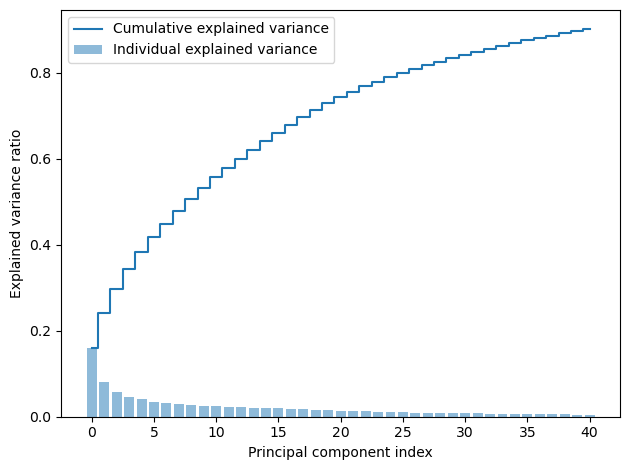

In [135]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [136]:
print(X_train1.shape)
print(X_test1.shape)
print (y_train1.shape)
print(y_test1.shape)

(3874, 116)
(969, 116)
(3874,)
(969,)


#### Run Regression models 

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [139]:
def models_automation(models, X_train1, y_train1,X_test1,y_test1):
    for model in models:
        model.fit(X_train1, y_train1)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train1, y_train1)}, Test -> {model.score(X_test1, y_test1)}")

In [140]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train1, y_train1,X_test1,y_test1)

LinearRegression: Train -> 0.39571467619117917, Test -> 0.37152258649734626
SGDRegressor: Train -> 0.3864955290281331, Test -> 0.37020098495866627
KNeighborsRegressor: Train -> 0.44555607725375124, Test -> 0.213624967966221
MLPRegressor: Train -> 0.4975329351622383, Test -> 0.34118331389443035
DecisionTreeRegressor: Train -> 1.0, Test -> -1.0611407334798422
RandomForestRegressor: Train -> 0.8996247870895929, Test -> 0.25597968321992437


#### Optimization

In [141]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(n_neighbors =9), MLPRegressor(solver = 'lbfgs', max_iter = 1500),DecisionTreeRegressor(criterion="poisson"),
              RandomForestRegressor(min_samples_split = 7,
                                    min_samples_leaf = 6,
                                    max_samples = 0.4,
                                    max_depth = 14,
                                    n_jobs = -1)]
models_automation(model_list, X_train1, y_train1,X_test1,y_test1)

LinearRegression: Train -> 0.39571467619117917, Test -> 0.37152258649734626
SGDRegressor: Train -> 0.38752892539949135, Test -> 0.37157003736922734
KNeighborsRegressor: Train -> 0.3811155404927261, Test -> 0.21592864649469934
MLPRegressor: Train -> 0.9564523857449115, Test -> -1.3193156458771043
DecisionTreeRegressor: Train -> 1.0, Test -> -0.6551193597531526
RandomForestRegressor: Train -> 0.5342145378890052, Test -> 0.38524533354727686
